# Projeto Final

Programação de Computadores - 2021/2

*   Professores: Jefersson, João Guilherme, Ítalo
*   Monitor: Vitor Rodarte Ricoy

## Integrantes do grupo

O projeto final pode ser realizado em grupos de até três alunos. Liste os integrantes do grupo abaixo com os respectivos números de matrícula.

Nome: Mariana Barcelos Teixeira, Matricula: 2021087080

Nome: João Pedro Lourenço Marchetti, Matricula: 2021036329


## Introdução

Neste projeto realizaremos análises sobre uma base de dados reais.

Trata-se de dados sobre as despesas pela cota para exercício da atividade parlamentar da câmara dos deputados, gerados pela própria câmara. Os dados utilizados estão disponíveis na página da [Câmara dos Deputados](https://dadosabertos.camara.leg.br/swagger/api.html#staticfile). 

Para esse projeto utilizaremos os dados de 2020 no formato JSON. Se você não souber o que é um arquivo JSON e quiser entender mais sobre esse formato de codificação de dados, existem diversos recursos na Internet. (Recomendamos a [introdução da Mozilla](https://developer.mozilla.org/pt-BR/docs/Learn/JavaScript/Objects/JSON), porém o conhecimento desse formato não é necessário para a realização do projeto.)

Além disso, para melhor entendimento do contexto dos dados usados no projeto, o site da Câmara dos Deputados explica o que é a [Cota para Exercício da Atividade Parlamentar](https://www2.camara.leg.br/transparencia/acesso-a-informacao/copy_of_perguntas-frequentes/cota-para-o-exercicio-da-atividade-parlamentar).

## Tarefa 0 - Leitura dos dados

**Essa tarefa já está pronta! :-)**

Na célula abaixo baixamos o arquivo com os dados, o extraímos e implementamos uma função para leitura do arquivo JSON. 

A função retorna uma lista de dicionários que corresponde à estrutura do arquivo JSON, ignorando o campo <code>dados</code> do arquivo de entrada, que encapsula todos os outros dados. 

Depois, a função <code>le_dados</code> é testada imprimindo três dicionários arbitrários da lista e o seu número total de registros. Esses três dicionários impressos podem ser usados para visualizar o formato do dicionário criado pela função <code>le_dados</code>.

O resultado dessa função, que é atribuído à variável <code>dados</code> nessa tarefa, será analisado nas próximas tarefas.

In [ ]:
# A biblioteca zipfile é utilizada para descompactar os arquivos compactados
import zipfile
# A biblioteca json é utilizada para carregar o arquivo JSON como objetos Python
import json

# Baixando os dados do site oficial (só funciona no Google Colab). Se
# desenvolvendo em seu computador, baixe o arquivo do site da câmara manualmente.
!wget https://www.camara.leg.br/cotas/Ano-2020.json.zip

# Funcao que le os dados de um arquivo JSON e retorna uma lista de dicionários
# contendo os dados de um dispêndio. Estamos levando em consideracao que todos
# os dados do arquivo cabem na memória do computador.
def le_dados(arquivo):
    # Carrega o conteúdo do arquivo JSON como objetos do Python:
    dados = json.load(arquivo)
    # Ignora o campo 'dados' que encapsula todos os dados do arquivo:
    dados = dados['dados']
    return dados


# Abrimos o arquivo baixado do site da câmara e carregamos seu conteúdo:
with zipfile.ZipFile('Ano-2020.json.zip', 'r') as zip_ref:
  dados = le_dados(zip_ref.open('Ano-2020.json'))

# Imprimindo algumas entradas de exemplo:
print(dados[0])
print(dados[10000])
print(dados[20000])
print(dados[10500])
print("Número total de registros: %d" % (len(dados)))

--2021-09-02 17:45:51--  https://www.camara.leg.br/cotas/Ano-2020.json.zip
Resolving www.camara.leg.br (www.camara.leg.br)... 200.219.133.54, 200.219.133.58, 200.219.133.84
Connecting to www.camara.leg.br (www.camara.leg.br)|200.219.133.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6494385 (6.2M) [application/zip]
Saving to: ‘Ano-2020.json.zip’

Ano-2020.json.zip   100%[===================>]   6.19M  5.69MB/s    in 1.1s    

2021-09-02 17:45:53 (5.69 MB/s) - ‘Ano-2020.json.zip’ saved [6494385/6494385]

{'nomeParlamentar': 'LIDERANÇA DO DEMOCRATAS', 'cpf': '', 'numeroCarteiraParlamentar': '', 'legislatura': 2019, 'siglaUF': 'NA', 'siglaPartido': '', 'codigoLegislatura': 56, 'numeroSubCota': 4, 'descricao': 'CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.', 'numeroEspecificacaoSubCota': 0, 'descricaoEspecificacao': '', 'fornecedor': 'LINEAR COMUNICACAO LTDA - EPP', 'cnpjCPF': '109.472.430/0019-5 ', 'numero': '2737', 'tipoDocumento': '4', 'dataEmissao': '2020-

Tarefa 1 - Quantidade de gasto por mês com e sem CPF
---------

**Agora é com você!** 

Implemente código para gerar dois gráficos: um da quantidade de gastos por mês que possuem um CPF registrado e outro da quantidade de gastos por mês sem um CPF registrado.

Dica: Para obter o valor gasto em um registro deve ser feita a operação: <code>valorDocumento - valorGlosa</code>. Essa operação será utilizada em todo o projeto. Para detectar se um dispêndio tem um CPF cadastrado, verificar se o campo <code>"cpf"</code> de cada dispêndio é diferente de <code>None</code> e de um string vazio.



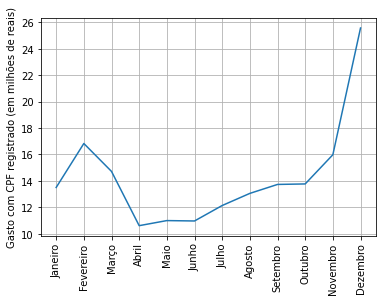

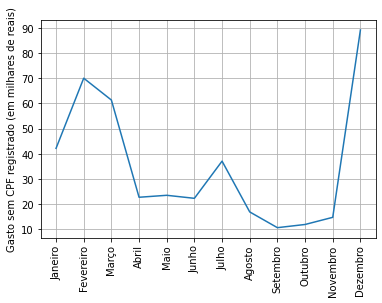

In [ ]:
import matplotlib.pyplot as plt

# Funcao usada em todo projeto para obter o valor de um gasto
def obter_valor_gasto(registro):
  return float(registro['valorDocumento']) - float(registro['valorGlosa'])

# Plota dois graficos: um indicando o total gasto a cada mês para os gastos com 
# CPF registrado e outro para os gastos sem CPF registrado.
# Entrada (que você deve calcular): uma lista de 12 elementos de gastos com CPF
# registrados a cada mês e uma lista de 12 elementos de gastos sem CPF
# registrado a cada mês. Nessas listas a posição 0 indica o mês de janeiro,
# 1 indica fevereiro e assim por diante.
def plota_dados(gastos_com_cpf, gastos_sem_cpf):
    # Valores do eixo x
    x = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
    # Valores do eixo y do primeiro gráfico
    y_com_cpf = []
    # Valores do eixo y do segundo gráfico
    y_sem_cpf = []

    # Salva os valores do eixo y do primeiro gráfico na lista y_com_cpf
    # Os valores são plotados em milhões de reais para facilitar a representação
    for gasto in gastos_com_cpf:
      y_com_cpf.append(gasto/(10**6))
    # Salva os valores do eixo y do segundo gráfico na lista y_sem_cpf
    for gasto in gastos_sem_cpf:
      y_sem_cpf.append(gasto/(10**3))

    # Plota o primeiro gráfico
    plt.plot(x, y_com_cpf)
    plt.ylabel('Gasto com CPF registrado (em milhões de reais)')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.show() # Mostra o gráfico

    # Plota o segundo gráfico
    plt.plot(x, y_sem_cpf)
    plt.ylabel('Gasto sem CPF registrado (em milhares de reais)')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.show() # Mostra o gráfico
    

############# BLOCO PRINCIPAL DO PROGRAMA #############



valor2messemcpf = dict()
valor2mescomcpf = dict()

for dado in dados:
     if dado['cpf']== '' or dado['cpf']== None:
       gastos = float(dado['valorDocumento']) - float(dado['valorGlosa'])
       mes = dado['mes']
       valor2messemcpf[mes]= round((valor2messemcpf.get(mes, 0) + gastos), 2)
     else:
       gastos = float(dado['valorDocumento']) - float(dado['valorGlosa'])
       mes = dado['mes']
       valor2mescomcpf[mes]= round((valor2mescomcpf.get(mes, 0) + gastos),2)

     

organizadosemcpf = sorted(valor2messemcpf.items())
organizadocomcpf = sorted(valor2mescomcpf.items())

gastosemcpf = []
gastocomcpf = []

for x in organizadosemcpf:
  gastosemcpf.append(x[1])
for x in organizadocomcpf:
  gastocomcpf.append(x[1])


plota_dados(gastocomcpf , gastosemcpf)


Tarefa 2 - Quantidade de gasto total de cada liderança
---------

Implemente um código capaz de plotar um gráfico com o gasto total de cada liderança. 

Para a exibição, os dados devem ser ordenados em ordem decrescente do total gasto, ou seja, o eixo x do gráfico deve ser ordenado a partir do partido que mais gastou até o que menos gastou.


As lideranças devem ser identificadas verificando se o campo <code>nomeParlamentar</code> começa com "LIDERANÇA DO ".

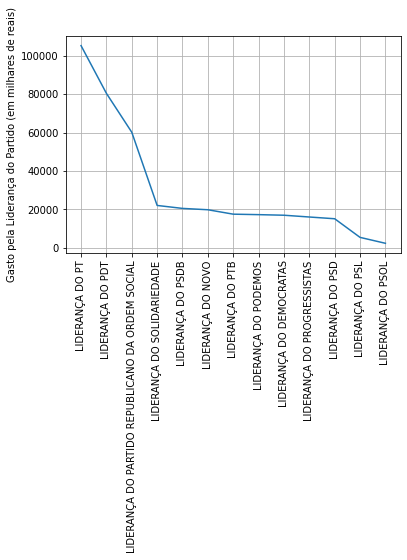

In [ ]:
import matplotlib.pyplot as plt
# Plota um grafico indicando o total gasto por cada liderança de partido em ordem
# decrescente do total gasto.
# Entrada: lista ordenada em que cada elemento é uma tupla contendo o nome do
# partido da liderança e o total gasto em milhares de reais.
def plota_dados(gasto_lideranca):
  # Calcula vetores com os valores no eixo X e no eixo Y
  partidos, gastos = zip(*gasto_lideranca)
  # Plota o gráfico
  plt.plot(partidos, gastos)
  plt.ylabel('Gasto pela Liderança do Partido (em milhares de reais)')
  plt.grid(True)
  plt.xticks(rotation=90)
  plt.show() # Mostra o gráfico
    

############# BLOCO PRINCIPAL DO PROGRAMA #############    

# Insira o código para calcular o gasto de cada liderança aqui.

gastoxpartido = dict()
for dado in dados:
     if "LIDERANÇA DO " in dado['nomeParlamentar']:
       gastos = float(dado['valorDocumento']) - float(dado['valorGlosa'])
       partido = dado['nomeParlamentar']
       gastoxpartido[partido]= round((gastoxpartido.get(partido, 0) + gastos), 2)
     else:
       continue

organizadogastoxpartido = []
for k, v in gastoxpartido.items():
  organizadogastoxpartido.append((v,k))

organizadogastoxpartido.sort(reverse=True)

gasto_lideranca = []
for k, v in organizadogastoxpartido:
  gasto_lideranca.append((v,k))


plota_dados(gasto_lideranca)



# Código para obter nome dos partidos
#x = gastoxpartido.keys()
#partidos1 = []
#for partido in x:
#partido = partido[13:]
#partidos1.append(partido)






Tarefa 3 - Gasto total dos parlamentares de cada partido
---------

Implemente um código capaz de plotar um gráfico com o gasto total dos parlamentares de cada partido. Você deve implementar uma função chamada `gasto_por_partido` para encapsular o cálculo do gasto total dos parlamentares dos partidos. Sua função deve retornar um dicionário onde as chaves são as siglas do partido e os valores o gasto total dos parlamentares daquele partido.

Para a exibição, os dados devem ser ordenados em ordem decrescente do total gasto, ou seja, o eixo x do gráfico deve ser ordenado a partir do partido em que os parlamentares mais gastaram até o partido em que eles menos gastaram.

Os gastos das lideranças não deve ser considerado.

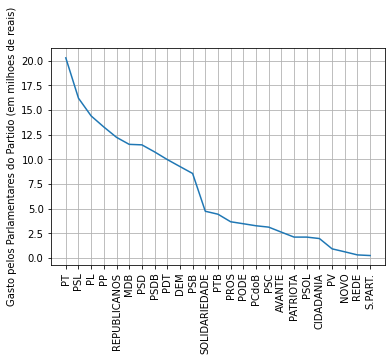

In [ ]:
# Plota um grafico indicando o total gasto pelos parlamentares de cada partido.
# Os dados são ordenados em ordem decrescente do total gasto.
# Entrada: dicionário em que a chave é o nome do partido e o valor é o total gasto.
def plota_dados(gasto_partido):
    # Valores do eixo x
    x = []
    # Valores do eixo y
    y = []

    # Lista que contém as tuplas de valor gasto seguido do partido
    valores = []

    # Preenche a lista de valores gastos e partidos
    for partido, gasto in gasto_partido.items():
      valores.append((gasto, partido))

    # Ordena a lista de valores em ordem decrescente
    valores.sort(reverse = True)

    # Preenche os valores do eixo x e y
    # Os valores do eixo y são convertidos para milhoes de reais 
    # para facilitar a representação
    for gasto, partido in valores:
      x.append(partido)
      y.append(gasto/(10**6)) 

    # Plota o gráfico
    plt.plot(x, y)
    plt.ylabel('Gasto pelos Parlamentares do Partido (em milhoes de reais)')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.show() # Mostra o gráfico
    

############# BLOCO PRINCIPAL DO PROGRAMA #############   

# Funcao que recebe o conjunto de dados sobre os gastos parlamentares
# e retorna um dicionário em que a chave é o partido e o valor
# é o gasto total dos parlamentares desse partido.

def gasto_por_partido(dados):
  gastos_por_partido = dict()
  for dado in dados:
    if dado['siglaPartido'] != '' and dado['nomeParlamentar'] != '':
      partido = dado['siglaPartido']
      gastos = float(dado['valorDocumento']) - float(dado['valorGlosa'])
      gastos_por_partido[partido] = round((gastos_por_partido.get(partido, 0) + gastos), 2)
    else:
      continue
  from collections import OrderedDict
  gastos_por_partido_ordenado = OrderedDict(sorted(gastos_por_partido.items(), key=lambda x: x[1], reverse=True))
  return gastos_por_partido_ordenado


plota_dados(gasto_por_partido(dados))


Tarefa 4 - Gasto médio por parlamentar de cada partido
---------

Implemente um código capaz de plotar um gráfico com o gasto médio dos parlamentares de cada partido. Vale notar que esse valor seria o valor da questão anterior divido pelo número de parlamentares do partido na base de dados. 

Para a exibição, os dados devem ser ordenados em ordem decrescente do gasto médio, ou seja, o eixo x do gráfico deve ser ordenado a partir do partido em que os parlamentares mais gastaram em média até o partido em que menos gastaram.

Para essa questão você deve **reutilizar a função implementada na questão anterior** para o cálculo do gasto total dos parlamentares dos partidos.

Dica: Lembre-se de não contar o mesmo parlamentar mais de uma vez na hora de dividir o gasto total pelo número de deputados de um partido.

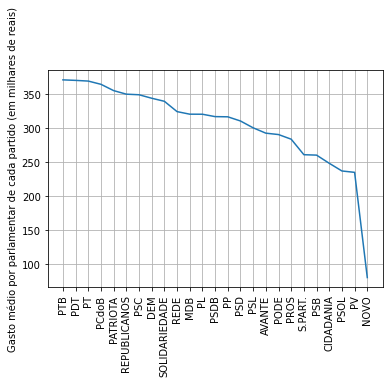

In [ ]:
import matplotlib.pyplot as plt
############# BLOCO PRINCIPAL DO PROGRAMA ############# 
# Insira aqui o código para calcular e plotar o gasto médio por parlamentar de
# cada partido.
# Reutilize a função gasto_por_partido criada na tarefa anterior.
def plota_dados(gasto_parlamentar_partido):
    # Valores do eixo x
    x = []
    # Valores do eixo y
    y = []

    # Lista que contém as tuplas de valor gasto seguido do partido
    valores = []

    # Preenche a lista de valores gastos médios dos parlamentares por partido
    for partido, gasto in gasto_parlamentar_partido.items():
      valores.append((gasto, partido))

    # Ordena a lista de valores em ordem decrescente
    valores.sort(reverse = True)

    # Preenche os valores do eixo x e y
    # Os valores do eixo y são convertidos para milhoes de reais 
    # para facilitar a representação
    for gasto, partido in valores:
      x.append(partido)
      y.append(gasto/10**3) 

    # Plota o gráfico
    plt.plot(x, y)
    plt.ylabel('Gasto médio por parlamentar de cada partido (em milhares de reais)')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.show() # Mostra o gráfico

################### número de parlamentares por partido
parlamentar_por_partido = dict()
lista_parlamentares = []
for dado in dados:
  if dado['nomeParlamentar'] != '' and "LIDERANÇA DO" not in dado['nomeParlamentar'] and dado['siglaPartido'] != '':
    partido = dado['siglaPartido']
    nome_parlamentar = dado['nomeParlamentar']
    if nome_parlamentar not in lista_parlamentares:
      lista_parlamentares.append(nome_parlamentar)
      parlamentar_por_partido[partido] = (parlamentar_por_partido.get(partido, 0) + 1)
    else:
      continue
  else:
    continue
from collections import OrderedDict
parlamentar_por_partido_ordenado = OrderedDict(sorted(parlamentar_por_partido.items(), key=lambda x: x[1], reverse=True))


#parlamentar_por_partido = dict()
#for dado in dados:
#  if dado['nomeParlamentar'] != '' and "LIDERANÇA DO" not in dado['nomeParlamentar'] and dado['siglaPartido'] != '':
#    partido = dado['siglaPartido']
#    n_parlamentares = int(len(dado['nomeParlamentar']))
#    parlamentar_por_partido[partido] = (parlamentar_por_partido.get(partido, 0) + n_parlamentares)
#  else:
#    continue
#from collections import OrderedDict
#parlamentar_por_partido_ordenado = OrderedDict(sorted(parlamentar_por_partido.items(), key=lambda x: x[1], reverse=True))
#print(parlamentar_por_partido_ordenado)
################ gasto por partido

gastos_por_partido = dict()
for dado in dados:
  if dado['siglaPartido'] != '' and dado['nomeParlamentar'] != '':
    partido = dado['siglaPartido']
    gastos = float(dado['valorDocumento']) - float(dado['valorGlosa'])
    gastos_por_partido[partido] = round((gastos_por_partido.get(partido, 0) + gastos), 2)
  else:
    continue
from collections import OrderedDict
gastos_por_partido_ordenado = OrderedDict(sorted(gastos_por_partido.items(), key=lambda x: x[1], reverse=True))


########################################### média de gastos por parlamentar
média_gastos = dict()
média_gastos = {partido: gastos_por_partido_ordenado[partido] // parlamentar_por_partido_ordenado.get(partido, 0) for partido in gastos_por_partido_ordenado.keys()}
from collections import OrderedDict
média_gastos_ordenado = OrderedDict(sorted(média_gastos.items(), key=lambda x: x[1], reverse=True))



plota_dados(média_gastos_ordenado)







Tarefa 5 - Total gasto pelos vinte parlamentares que mais gastaram
---------

Implemente um código para plotar um gráfico com o gasto total, em milhares de reais, dos 20 parlamentares que mais gastaram. Ordene os 20 parlamentaras em ordem decrescente de gastos. Os parlamentares devem ser identificados por seu nome, indicado no campo <code>nomeParlamentar</code>. 

Associe um registro a um parlamentar utilizando o campo <code>cpf</code> dos registros. Ignore registros com o campo <code>cpf</code> for vazio.

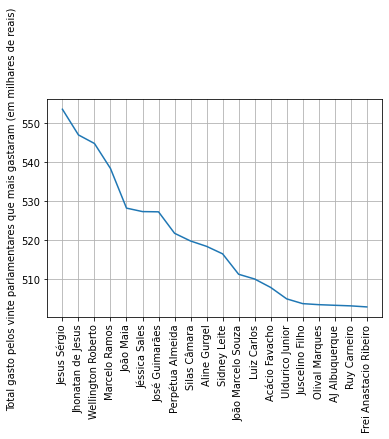

In [ ]:
############# BLOCO PRINCIPAL DO PROGRAMA #############    

# Implemente código para calcular e plotar o gasto total dos 20
# Código para plotar o gráfico

def plota_dados(vinte_que_mais_gastaram):
    # Valores do eixo x
    x = []
    # Valores do eixo y
    y = []

    # Lista que contém as tuplas de valor gasto seguido do nome parlamentar
    valores = vinte_que_mais_gastaram


    # Preenche os valores do eixo x e y
    # Os valores do eixo y são convertidos para milhoes de reais 
    # para facilitar a representação
    for gasto, parlamentar in valores:
      x.append(parlamentar)
      y.append(gasto/(10**3)) 

    # Plota o gráfico
    plt.plot(x, y)
    plt.ylabel('Total gasto pelos vinte parlamentares que mais gastaram (em milhares de reais)')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.show() # Mostra o gráfico

# Código para calcular os 20 primeiros parlamentares que mais gastaram
gasto_por_nome = dict()
for dado in dados:
  if dado['cpf'] != '' or dado['cpf']== None:
    nome = dado['nomeParlamentar']
    gastos_ = float(dado['valorDocumento']) - float(dado['valorGlosa'])
    gasto_por_nome[nome] = round((gasto_por_nome.get(nome, 0) + gastos_), 2)
  else:
    continue


# parlamentares que mais gastaram.
gasto_parlamentar = []

for k, v in gasto_por_nome.items():
  gasto_parlamentar.append((v,k))

gasto_parlamentar.sort(reverse=True)

vinte_primeiros = []

for x in range(20):
  vinte_primeiros.append(gasto_parlamentar[x])


plota_dados(vinte_primeiros)

Tarefa 6 - Distribuição de gastos por parlamentar
---------

Implemente um código para plotar um gráfico com a função distribuição acumulada (FDC) dos gastos dos parlamentares. Em um gráfico de FDC, o eixo X mostra o valor gasto, e o eixo Y mostra a fração de parlamentares que gastaram até X. O gráfico de exemplo indica que aproximadamente 9% dos parlamentares (eixo Y) gastaram menos de 100 mil reais (eixo X).

Sugestão: Você pode reutilizar a função da tarefa anterior para calcular os valores gastos pelos parlamentares, bastando alterar apenas a função responsável por plotar o gráfico.

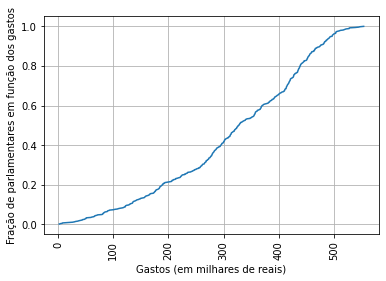

In [ ]:
############# BLOCO PRINCIPAL DO PROGRAMA #############    

# Implemente código para calcular e plotar a FDC do gasto total dos parlamentares.

gasto_por_nome = dict()
for dado in dados:
  if dado['cpf'] != '' or dado['cpf']== None:
    nome = dado['nomeParlamentar']
    gastos_ = float(dado['valorDocumento']) - float(dado['valorGlosa'])
    gasto_por_nome[nome] = round((gasto_por_nome.get(nome, 0) + gastos_), 2)
  else:
    continue


# parlamentares que mais gastaram (ordem crescente).
gasto_parlamentar = []

for k, v in gasto_por_nome.items():
  gasto_parlamentar.append((v,k))

gasto_parlamentar.sort()

################################ quantidade de parlamentares.



#################### Função para plotar os dados
def plota_dados(FDC):
  # Valores do eixo x
  x = []
  # Valores do eixo y
  y = []
  # Fazendo uma lista com os valores de y

  # Lista que contém as tuplas de valor gasto seguido do nome parlamentar
  valores = gasto_parlamentar

  # Preenche os valores do eixo x e y
  # Os valores do eixo y são convertidos para milhoes de reais 
  # para facilitar a representação
  porcentagem = 0
  for gasto, parlamentar in valores:
    gasto_em_milhares = gasto/(10**3)
    n_parlamentar = 1/len(valores)
    porcentagem += n_parlamentar
    x.append(gasto_em_milhares)
    y.append(porcentagem) 
    

    # Plota o gráfico
  plt.plot(x, y)
  plt.ylabel('Fração de parlamentares em função dos gastos')
  plt.xlabel('Gastos (em milhares de reais)')
  plt.grid(True)
  plt.xticks(rotation=90)
  plt.show() # Mostra o gráfico



plota_dados(gasto_parlamentar)

Tarefa 7 - Total gasto com passagens pelos vinte parlamentares que mais gastaram com passagens
---------

Implemente um código para plotar um gráfico mostrando o gasto total com passagens dos 20 parlamentares que mais gastaram com passagens. Assim, como na Tarefa 5, os parlamentares devem ser identificados por seu nome, indicado no campo <code>nomeParlamentar</code>. 

Para determinar se um gasto é relativo a passagens, você pode verificar se o campo <code>passageiro</code> não é vazio.

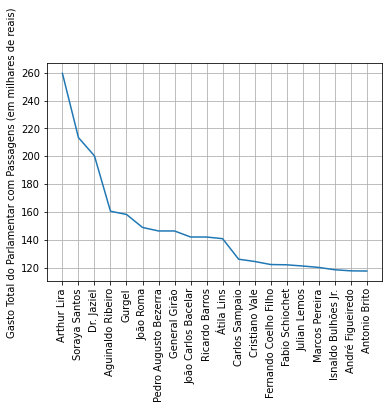

In [ ]:
import matplotlib.pyplot as plt
############# BLOCO PRINCIPAL DO PROGRAMA #############    

# Implemente código para calcular e plotar o gasto total dos 20 parlamentares que mais gastaram com passagens
# Código para plotar o gráfico

def plota_dados(vinte_que_mais_gastaram):
    # Valores do eixo x
    x = []
    # Valores do eixo y
    y = []

    # Lista que contém as tuplas de valor gasto seguido do nome parlamentar
    valores = vinte_que_mais_gastaram


    # Preenche os valores do eixo x e y
    # Os valores do eixo y são convertidos para milhoes de reais 
    # para facilitar a representação
    for gasto, parlamentar in valores:
      x.append(parlamentar)
      y.append(gasto/(10**3)) 

    # Plota o gráfico
    plt.plot(x, y)
    plt.ylabel('Gasto Total do Parlamentar com Passagens (em milhares de reais)')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.show() # Mostra o gráfico

# Código para calcular os 20 primeiros parlamentares que mais gastaram
gasto_por_nome = dict()
for dado in dados:
  if dado['cpf'] != '' or dado['cpf']== None:
    if dado['passageiro'] != '' and dado['passageiro'] != None:
      nome = dado['nomeParlamentar']
      gastos_ = float(dado['valorDocumento']) - float(dado['valorGlosa'])
      gasto_por_nome[nome] = round((gasto_por_nome.get(nome, 0) + gastos_), 2)
    else: continue
  else:
    continue


# parlamentares que mais gastaram.
gasto_parlamentar = []

for k, v in gasto_por_nome.items():
  gasto_parlamentar.append((v,k))

gasto_parlamentar.sort(reverse=True)

vinte_primeiros = []

for x in range(20):
  vinte_primeiros.append(gasto_parlamentar[x])


plota_dados(vinte_primeiros)

Tarefa 8 - Total pago aos vinte fornecedores que mais receberam
---------

Implemente um código para plotar um gráfico com o total pago aos 20 fornecedores que mais receberam. Os fornecedores devem ser ordenados em ordem decrescente pelo total recebido e devem ser identificados pelo campo <code>fornecedor</code>. Registros com o campo <code>fornecedor</code> vazio devem ser ignorados nos cálculos e no gráfico.

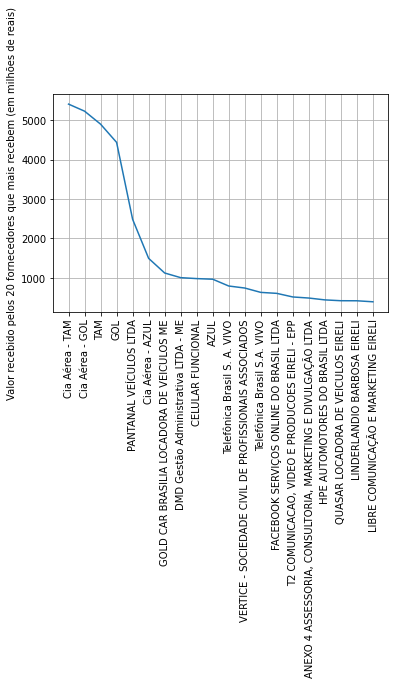

In [ ]:
############# BLOCO PRINCIPAL DO PROGRAMA #############    
# Código para calcular os 20 primeiros parlamentares que mais gastaram
gasto_por_fornecedor = dict()
for dado in dados:
  if dado['fornecedor'] != '' or dado['fornecedor'] != None:
    fornecedor = dado['fornecedor']
    gastos_ = float(dado['valorDocumento']) - float(dado['valorGlosa'])
    gasto_por_fornecedor[fornecedor] = round((gasto_por_fornecedor.get(fornecedor, 0) + gastos_), 2)
  else:
    continue


# fornecedores que mais recebem
gasto_fornecedor = []

for k, v in gasto_por_fornecedor.items():
  gasto_fornecedor.append((v,k))

gasto_fornecedor.sort(reverse=True)

vinte_fornecedores = []
for x in range(20):
  vinte_fornecedores.append(gasto_fornecedor[x])


# função para plotar o gráfico
def plota_dados(fornecedores):
    # Valores do eixo x
    x = []
    # Valores do eixo y
    y = []

    # Lista que contém as tuplas de valor gasto seguido do nome parlamentar
    valores = vinte_fornecedores


    # Preenche os valores do eixo x e y
    # Os valores do eixo y são convertidos para milhoes de reais 
    # para facilitar a representação
    for gasto, fornecedor in valores:
      x.append(fornecedor)
      y.append(gasto/(10**3)) 

    # Plota o gráfico
    plt.plot(x, y)
    plt.ylabel('Valor recebido pelos 20 fornecedores que mais recebem (em milhões de reais)')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.show() # Mostra o gráfico

plota_dados(vinte_fornecedores)

# Insira seu código aqui

Tarefa 9 - Distribuição de valores de pagamentos a fornecedores
---------

Implemente um código para plotar um gráfico com a função distribuição acumulada (FDC) dos valores dos pagamentos menores que 500 mil reais. Em um gráfico de FDC, o eixo X mostra o valor total dos pagamentos a um fornecedor, e o eixo Y mostra a fração de fornecedores que receberam até X reais. O gráfico de exemplo indica que mais de 80% dos fornecedores receberam menos de 10 mil reais.

Os valores pagos exibidos no eixo X devem ser limitados a até 500 mil reais, ou seja, serão considerados apenas os fornecedores que receberam até 500 mil rais.

Sugestão: Você pode usar a mesma função da tarefa anterior para calcular os valores pagos aos fornecedores, alterando apenas a função responsável por plotar o gráfico.

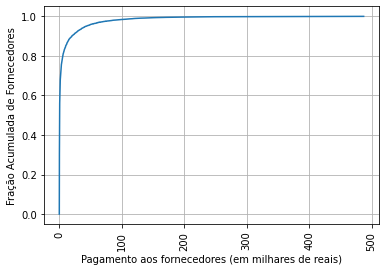

In [ ]:
############# BLOCO PRINCIPAL DO PROGRAMA #############    
gasto_por_fornecedor = dict()
for dado in dados:
  if dado['fornecedor'] != '' or dado['fornecedor'] != None:
    fornecedor = dado['fornecedor']
    gastos_ = float(dado['valorDocumento']) - float(dado['valorGlosa'])
    gasto_por_fornecedor[fornecedor] = round((gasto_por_fornecedor.get(fornecedor, 0) + gastos_), 2)
  else:
    continue

gasto_fornecedor = []

for k, v in gasto_por_fornecedor.items():
  if v <= 500000:
    gasto_fornecedor.append((v,k))

gasto_fornecedor.sort()
# Função
def plota_dados(FDC):
  # Valores do eixo x
  x = []
  # Valores do eixo y
  y = []
  # Fazendo uma lista com os valores de y

  # Lista que contém as tuplas de valor gasto seguido do nome parlamentar
  valores = gasto_fornecedor

  # Preenche os valores do eixo x e y
  # Os valores do eixo y são convertidos para milhoes de reais 
  # para facilitar a representação
  porcentagem = 0
  for gasto, fornecedor in valores:
    gasto_em_milhares = gasto/(10**3)
    n_parlamentar = 1/len(valores)
    porcentagem += n_parlamentar
    x.append(gasto_em_milhares)
    y.append(porcentagem) 
    

    # Plota o gráfico
  plt.plot(x, y)
  plt.ylabel('Fração Acumulada de Fornecedores')
  plt.xlabel('Pagamento aos fornecedores (em milhares de reais)')
  plt.grid(True)
  plt.xticks(rotation=90)
  plt.show() # Mostra o gráfico



plota_dados(gasto_fornecedor)

Tarefa 10 - Identificação do Grupo e Entrega
---------

Verifique que os integrantes do grupo estão listados no espaço reservado para isso no começo do documento antes de submeter sua solução no Moodle.